In [1]:
import tensorflow as tf
import numpy as np
from tensorflow import keras
import os
import cv2
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt

In [2]:
train = ImageDataGenerator(rescale=1/255)
test = ImageDataGenerator(rescale=1/255)

train_dataset = train.flow_from_directory("forest_fire/Training and Validation/",
                                          target_size=(150,150),
                                          batch_size = 32,
                                          class_mode = 'binary')
                                         
test_dataset = test.flow_from_directory("forest_fire/Testing/",
                                          target_size=(150,150),
                                          batch_size =32,
                                          class_mode = 'binary')

Found 1832 images belonging to 2 classes.
Found 68 images belonging to 2 classes.


In [3]:
test_dataset.class_indices

{'fire': 0, 'nofire': 1}

In [4]:
model = keras.Sequential()
model.add(keras.layers.Conv2D(32,(3,3),activation='relu',input_shape=(150,150,3)))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(64,(3,3),activation='relu'))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(128,(3,3),activation='relu'))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(128,(3,3),activation='relu'))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(512,activation='relu'))
model.add(keras.layers.Dense(1,activation='sigmoid'))

In [5]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [6]:
r = model.fit(train_dataset,
         epochs = 5,
         validation_data = test_dataset)

Epoch 1/5
58/58 [==============================] - 24s 403ms/step - loss: 0.2702 - accuracy: 0.8876 - val_loss: 0.2845 - val_accuracy: 0.8971
Epoch 2/5
58/58 [==============================] - 22s 377ms/step - loss: 0.1847 - accuracy: 0.9410 - val_loss: 0.2734 - val_accuracy: 0.8824
Epoch 3/5
58/58 [==============================] - 22s 382ms/step - loss: 0.1339 - accuracy: 0.9574 - val_loss: 0.3137 - val_accuracy: 0.8676
Epoch 4/5
58/58 [==============================] - 22s 370ms/step - loss: 0.1089 - accuracy: 0.9672 - val_loss: 0.2153 - val_accuracy: 0.8971
Epoch 5/5
58/58 [==============================] - 22s 382ms/step - loss: 0.0903 - accuracy: 0.9711 - val_loss: 0.2570 - val_accuracy: 0.8971


In [7]:
predictions = model.predict(test_dataset)
predictions = np.round(predictions)

3/3 [==============================] - 0s 58ms/step


In [8]:
predictions

array([[1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.]], dtype=float32)

In [9]:
print(len(predictions))

68


In [10]:
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'

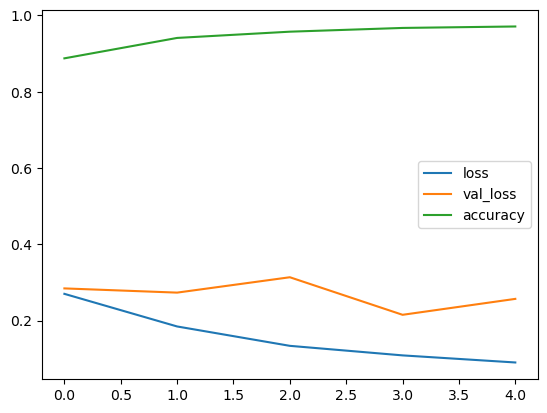

In [11]:
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.plot(r.history['accuracy'], label='accuracy')
plt.legend()

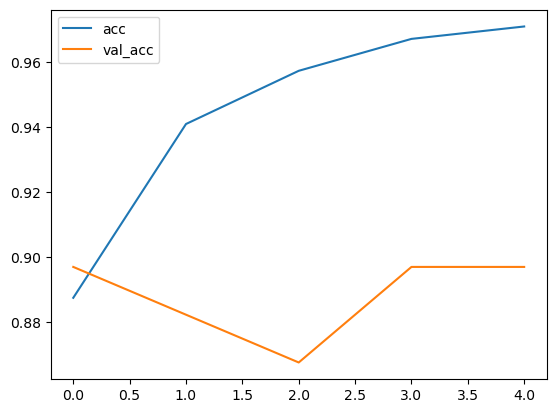

In [12]:
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()

In [13]:
def predictImage(filename):
    img1 = image.load_img(filename,target_size=(150,150))
    plt.imshow(img1)
    Y = image.img_to_array(img1)
    X = np.expand_dims(Y,axis=0)
    val = model.predict(X)
    print(val)
    if val == 1:
        plt.xlabel("No Fire",fontsize=30)
    elif val == 0:
        plt.xlabel("Fire",fontsize=30)

1/1 [==============================] - 0s 173ms/step
[[0.]]


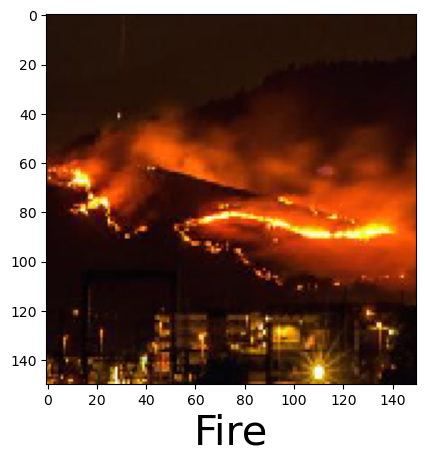

In [14]:
predictImage("forest_fire/Testing/fire/abc182.jpg")

1/1 [==============================] - 0s 31ms/step
[[0.]]


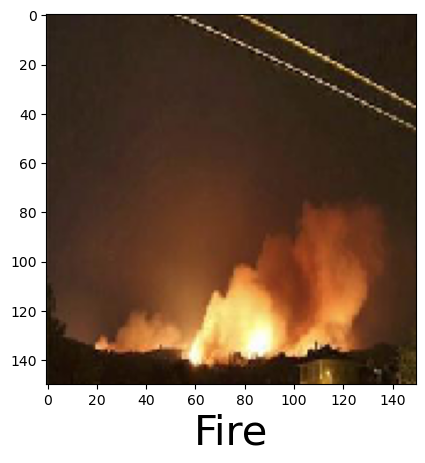

In [15]:
predictImage('forest_fire/Testing/fire/abc190.jpg')

1/1 [==============================] - 0s 31ms/step
[[1.]]


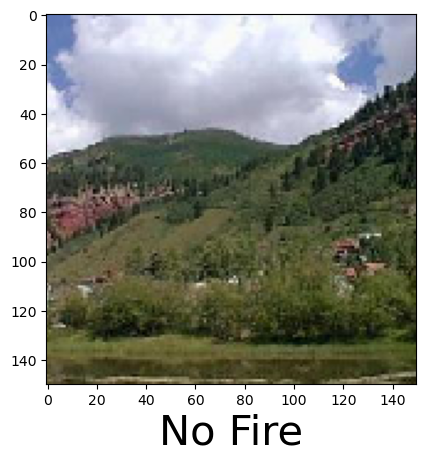

In [16]:
predictImage('forest_fire/Testing/nofire/abc346.jpg')

1/1 [==============================] - 0s 16ms/step
[[1.]]


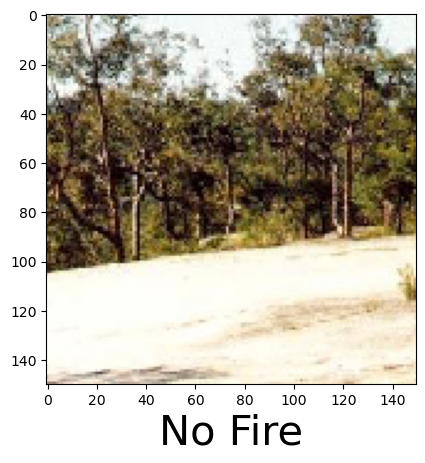

In [17]:
predictImage('forest_fire/Testing/nofire/abc361.jpg')

1/1 [==============================] - 0s 16ms/step
[[0.]]


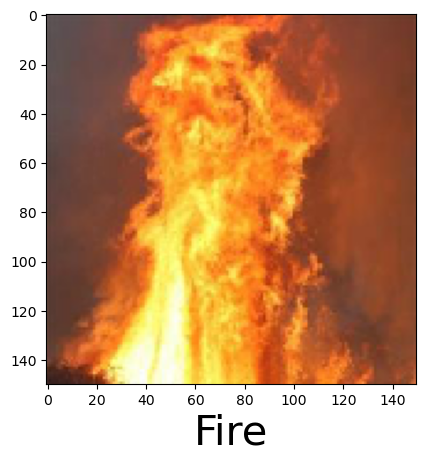

In [18]:
predictImage('forest_fire/Training and Validation/fire/abc011.jpg')

1/1 [==============================] - 0s 16ms/step
[[0.]]


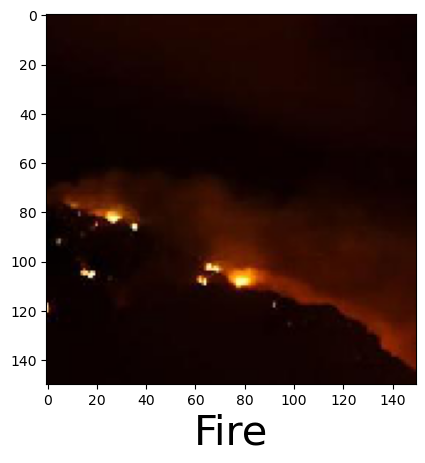

In [19]:
predictImage('forest_fire/Testing/fire/abc172.jpg')

1/1 [==============================] - 0s 78ms/step
[[0.]]


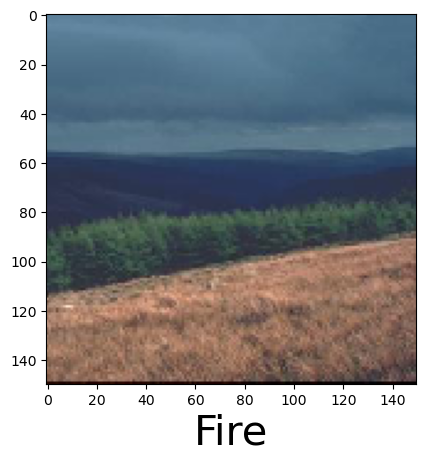

In [20]:
predictImage('forest_fire/Testing/nofire/abc341.jpg')